In [2]:
from google.colab import files
uploaded = files.upload()

Saving unsupervised learning.csv to unsupervised learning.csv


In [3]:
 import pandas as pd
 df = pd.read_csv('unsupervised learning.csv')
 df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


Shape: (2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0



Missing values per column:
 Income    24
dtype: int64

Unique counts:
 Z_Revenue                 1
Z_CostContact             1
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
Complain                  2
AcceptedCmp2              2
Response                  2
Teenhome                  3
Kidhome                   3
Education                 5
Marital_Status            8
NumStorePurchases        14
NumCatalogPurchases      14
NumDealsPurchases        15
NumWebPurchases          15
NumWebVisitsMonth        16
Year_Birth               59
Recency                 100
MntFruits               158
MntSweetProducts        177
MntFishProducts         182
MntGoldProds            213
MntMeatProducts         558
Dt_Customer             663
MntWines                776
Income                 1974
ID                     2240
dtype: int64
Dropped Z_CostContact
Dropped Z_Revenue
Dropped Dt_Customer
Total missing values: 24
Dropped rows with 

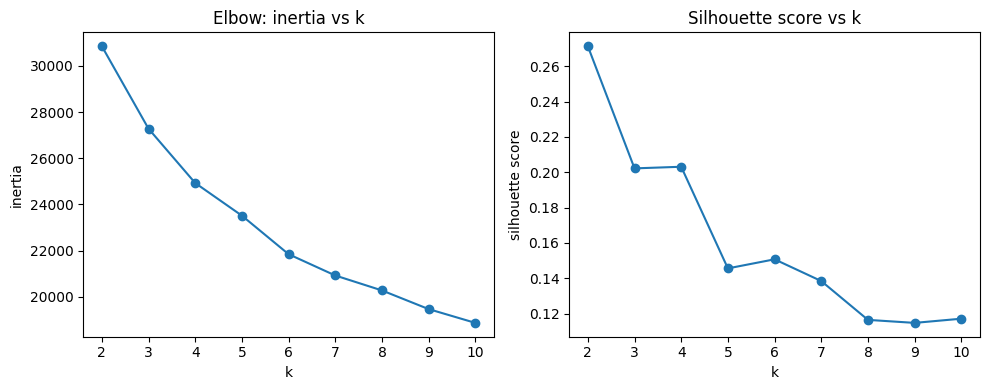

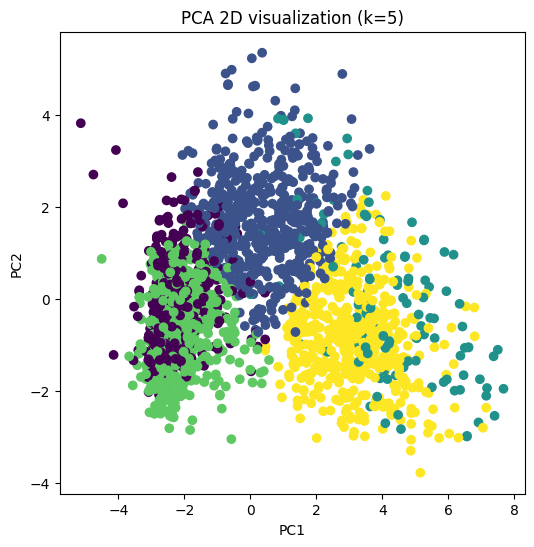

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,day,month,year
segment,,,,,,,,,,,,,,,,,,,,,
0,5773.725,1975.658,2.036,3.776,31013.744,0.860,0.264,47.968,43.063,6.311,...,0.097,0.002,0.000,0.000,0.000,0.017,0.156,15.514,9.057,2012.600
1,5463.859,1963.661,2.677,3.693,57784.841,0.231,0.973,48.399,466.291,21.448,...,0.061,0.119,0.005,0.025,0.000,0.009,0.105,15.619,6.917,2012.839
2,5505.509,1970.629,2.716,3.698,79231.629,0.052,0.216,46.819,931.422,44.000,...,0.147,0.655,0.819,0.621,0.241,0.009,0.759,15.845,6.405,2012.966
3,5509.595,1968.582,2.444,3.665,38742.441,0.727,0.578,50.075,47.432,4.859,...,0.056,0.019,0.000,0.000,0.003,0.009,0.043,16.090,3.925,2013.568
4,5661.318,1967.920,2.286,3.793,75635.998,0.038,0.197,49.972,527.209,71.700,...,0.068,0.020,0.129,0.113,0.000,0.004,0.177,15.274,6.453,2013.036


Saved segmented CSV to: /content/segmented_customers.csv


In [7]:
# Script lengkap: segmentasi pelanggan step-by-step
# Jalankan di environment dengan: pandas, numpy, scikit-learn, matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# ---- Ubah path ini jika perlu ----
PATH_CSV = "/content/unsupervised learning.csv"

# 1) Load
df = pd.read_csv(PATH_CSV)
print("Shape:", df.shape)
display(df.head())

# 2) Cek missing dan unique
print("\nMissing values per column:\n", df.isnull().sum()[lambda s: s>0])
print("\nUnique counts:\n", df.nunique().sort_values())

# 3) Pra-pemrosesan
df_proc = df.copy()

# Jika ada Dt_Customer -> ambil day/month/year
if 'Dt_Customer' in df_proc.columns:
    parts = df_proc['Dt_Customer'].astype(str).str.split('-', expand=True)
    if parts.shape[1] >= 3:
        df_proc['day'] = pd.to_numeric(parts[0], errors='coerce')
        df_proc['month'] = pd.to_numeric(parts[1], errors='coerce')
        df_proc['year'] = pd.to_numeric(parts[2], errors='coerce')

# Hapus kolom yang tidak relevan (sesuai PDF)
for c in ['Z_CostContact','Z_Revenue','Dt_Customer']:
    if c in df_proc.columns:
        df_proc.drop(columns=c, inplace=True)
        print("Dropped", c)

# Tangani missing: jika sedikit, drop; jika banyak, pertimbangkan imputasi
missing_total = df_proc.isnull().sum().sum()
print("Total missing values:", missing_total)
if missing_total > 0:
    # Pilihan sederhana: hapus baris yang ada missing
    df_proc = df_proc.dropna().reset_index(drop=True)
    print("Dropped rows with missing values. New shape:", df_proc.shape)

# Encode kolom kategorikal dengan LabelEncoder (sederhana)
label_encoders = {}
for col in df_proc.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_proc[col] = le.fit_transform(df_proc[col].astype(str))
    label_encoders[col] = le
    print("Encoded:", col)

# 4) Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_proc.values)

# 5) (Opsional tapi direkomendasikan) PCA untuk mempercepat clustering
pca = PCA(n_components=min(10, X_scaled.shape[1]), random_state=42)
X_pca = pca.fit_transform(X_scaled)
print("Explained variance ratio (sum):", pca.explained_variance_ratio_.sum().round(3))

# 6) Elbow + silhouette untuk memilih k
inertias = []
sil_scores = []
ks = range(2,11)
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_pca)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_pca, labels))

# Plot elbow + silhouette
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(list(ks), inertias, marker='o')
plt.title('Elbow: inertia vs k')
plt.xlabel('k')
plt.ylabel('inertia')

plt.subplot(1,2,2)
plt.plot(list(ks), sil_scores, marker='o')
plt.title('Silhouette score vs k')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.tight_layout()
plt.show()

# 7) Pilih k (misal 5), latih KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_pca)

# Lampirkan label ke data asli (atau preprocessed)
df_result = df.loc[df_proc.index].copy().reset_index(drop=True)  # original rows corresponding to df_proc
df_result['segment'] = labels

# 8) Visualisasi 2D: gunakan PCA atau t-SNE (PCA 2D lebih cepat)
pca2 = PCA(n_components=2, random_state=42)
X_pca2 = pca2.fit_transform(X_scaled)
plt.figure(figsize=(6,6))
plt.scatter(X_pca2[:,0], X_pca2[:,1], c=labels)
plt.title(f"PCA 2D visualization (k={k})")
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.show()

# 9) Profiling cluster: mean tiap fitur per cluster
profile = pd.concat([pd.DataFrame(df_proc).reset_index(drop=True), pd.Series(labels, name='segment')], axis=1)
cluster_profile = profile.groupby('segment').mean().round(3)
display(cluster_profile)

# 10) Simpan hasil
OUTPATH = "/content/segmented_customers.csv"
df_result.to_csv(OUTPATH, index=False)
print("Saved segmented CSV to:", OUTPATH)